In [22]:
#Read dataset读取数据
import pandas
df = pandas.read_csv('D:\data.csv')
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [23]:
#Check the dataset for null values检测数据集是否存在空值
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [24]:
#Delete useless data fields删除不需要的数据栏
df.drop(df.columns[0:3], axis=1, inplace=True)
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [25]:
#Data conversion数据转换
var = ['international_plan', 'voice_mail_plan', 'churn']

for v in var:
    df[v] = df[v].map(lambda e: 1 if e == 'yes' else 0)
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [26]:
#Set dependent variables and independent variables设置变量
y = df.iloc[:,-1]
X = df.iloc[:,:-1]

In [28]:
X.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [29]:
#Splitting the dataset into training set and test set切割测试集和训练集
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state= 123)

train_X.shape
test_X.shape

(1275, 16)

In [30]:
#Implement DecisionTree algorithm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
clf1 = DecisionTreeClassifier(max_depth=3)
clf1.fit(train_X, train_y)
predicted1 = clf1.predict(test_X)
print(classification_report(test_y, predicted1))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1102
           1       0.92      0.35      0.51       173

    accuracy                           0.91      1275
   macro avg       0.92      0.67      0.73      1275
weighted avg       0.91      0.91      0.89      1275



In [31]:
#Implement SVM algorithm
from sklearn.svm import SVC
from sklearn.metrics import classification_report
clf2 = SVC(probability=True, kernel='linear', cache_size=7000, max_iter=10000)
clf2.fit(train_X, train_y)
predicted2 = clf2.predict(test_X)
print(classification_report(test_y, predicted2))


              precision    recall  f1-score   support

           0       0.83      0.39      0.53      1102
           1       0.11      0.49      0.18       173

    accuracy                           0.40      1275
   macro avg       0.47      0.44      0.36      1275
weighted avg       0.73      0.40      0.48      1275



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [11]:
#Implement LogisticsRegression algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
clf3 = LogisticRegression()
clf3.fit(train_X, train_y)
predicted3 = clf3.predict(test_X)
print(classification_report(test_y, predicted3))



              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1102
           1       0.44      0.07      0.12       173

    accuracy                           0.86      1275
   macro avg       0.66      0.53      0.52      1275
weighted avg       0.81      0.86      0.82      1275



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
#Implement RandomForest algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
clf4 = RandomForestClassifier()
clf4.fit(train_X, train_y)
predicted4 = clf4.predict(test_X)
print(classification_report(test_y, predicted4))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1102
           1       0.96      0.73      0.83       173

    accuracy                           0.96      1275
   macro avg       0.96      0.86      0.91      1275
weighted avg       0.96      0.96      0.96      1275



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


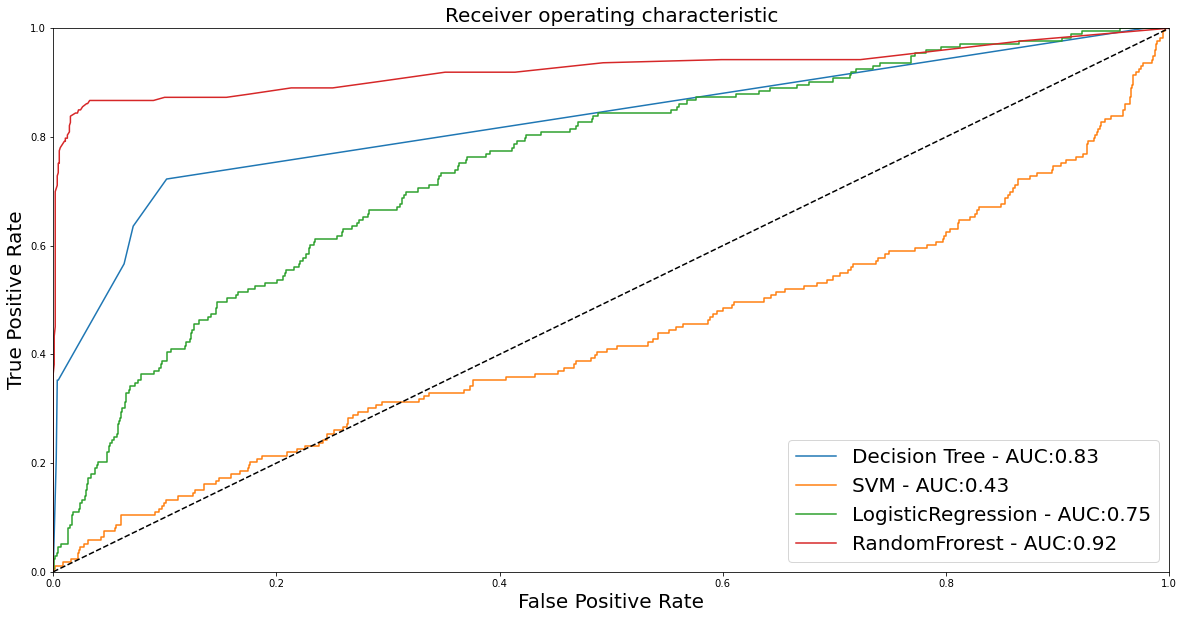

In [34]:
#Evaluate the algorithm model using ROC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
plt.figure(figsize= [20,10])
for clf, title in zip([clf1,clf2,clf3, clf4], ['Decision Tree','SVM','LogisticRegression','RandomFrorest']):
    probas = clf.fit(train_X, train_y).predict_proba(test_X)
    fpr, tpr, thresholds = roc_curve(test_y, probas[:,1])
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)))
    
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

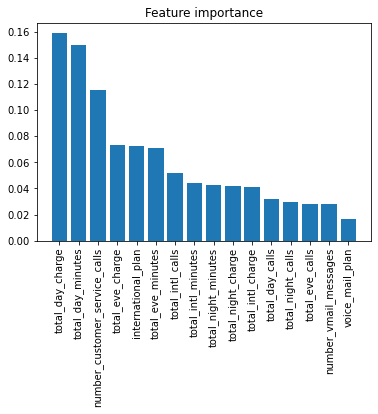

In [35]:
#Evaluate feature importance
import matplotlib.pyplot as plt
importance = clf4.feature_importances_
name = train_X.columns
plt.title('Feature importance')
plt.bar(range(0, len(name)), importance[importance.argsort()[::-1]])
plt.xticks(range(0, len(name)), name[importance.argsort()[::-1]], rotation=90)
plt.show()